![minh hoa](download.jpeg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
netflix_data=pd.read_csv("./netflix_full.csv")
netflix_data.head()

,id,type,name,creator,starring,year,rating,time,genres,country,describle
0,81416533,Movie,Heart of Stone,NaN,"Gal Gadot, Jamie Dornan, Alia Bhatt",2023,TV-PG,125 min,"Drama Movies ,Action & Adventure Movies ,Spy M...",United States,An intelligence operative for a shadowy global...
1,80991406,Movie,Johnny English Strikes Again,NaN,"Rowan Atkinson, Ben Miller, Emma Thompson",2018,TV-PG,88 min,"Family Movies ,Comedy Movies ,Action & Adventu...",United States,After a cyberattack exposes every undercover a...
2,81644420,Movie,Hunt,NaN,"Lee Jung-jae, Jung Woo-sung, Jeon Hye-jin",2022,TV-14,125 min,"Drama Movies ,Action & Adventure Movies ,Spy M...",South Korea,As a pair of national security agents hunt a N...
3,70208104,Movie,Safe House,NaN,"Denzel Washington, Ryan Reynolds, Vera Farmiga",2012,TV-14,114 min,"Action & Adventure Movies ,Spy Movies",United States,CIA operative Matt Weston must get a dangerous...
4,70297761,Movie,Commitment,NaN,"Choi Seung-hyun, Han Ye-ri, Yoon Je-moon",2013,TV-14,112 min,"Action & Adventure Movies ,Spy Movies",South Korea,After taking on a spying mission to free his s...


In [3]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3256 non-null   int64 
 1   type       3256 non-null   object
 2   name       3256 non-null   object
 3   creator    713 non-null    object
 4   starring   3256 non-null   object
 5   year       3256 non-null   int64 
 6   rating     3256 non-null   object
 7   time       3256 non-null   object
 8   genres     3255 non-null   object
 9   country    2974 non-null   object
 10  describle  3256 non-null   object
dtypes: int64(2), object(9)
memory usage: 279.9+ KB


### RECOMMENDATION SYSTEM

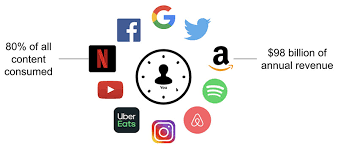

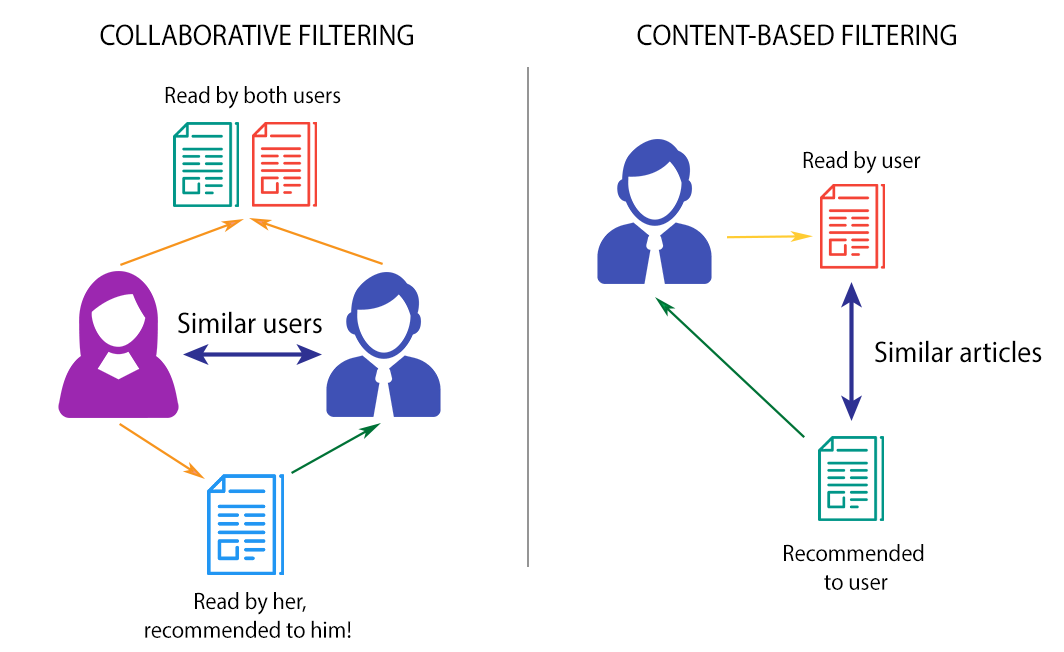

### TF-IDF (Term Frequency-Inverse Document Frequency) là một thang điểm được tính dựa trên tần suất xuất hiện của một từ trong một văn bản, nhưng nó sẽ bị giảm giá trị nếu từ đó xuất hiện trong quá nhiều văn bản khác. Mục tiêu của TF-IDF là làm giảm tầm quan trọng của các từ xuất hiện quá thường xuyên trong các đoạn văn, điều này giúp tính toán được độ tương tự giữa các văn bản một cách chính xác hơn.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
tfidf = TfidfVectorizer(stop_words='english')
netflix_data['describle'] = netflix_data['describle'].fillna('')
tfidf_matrix = tfidf.fit_transform(netflix_data['describle'])
tfidf_matrix.shape

(3256, 10900)

In [6]:
print(tfidf_matrix.toarray()[:10, :20])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Dùng cosine để tính toán độ tương đồng

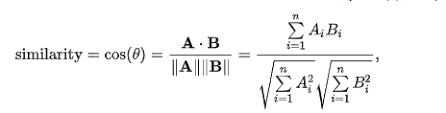


In [7]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

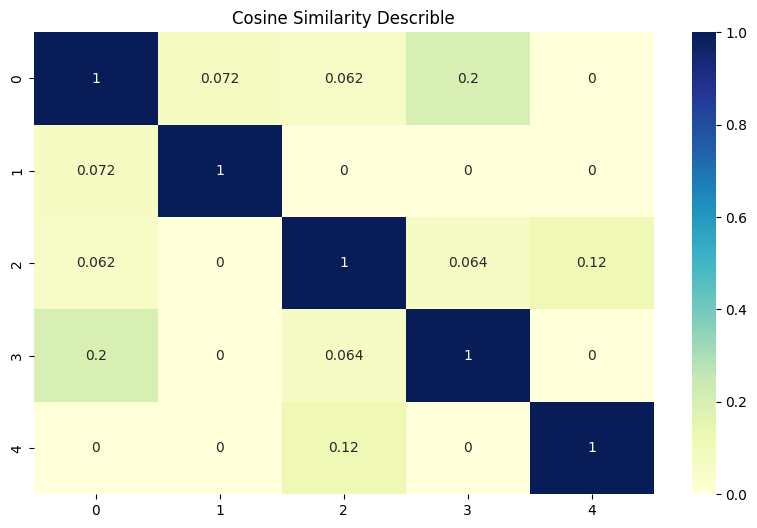

In [8]:
subset_cosine_sim = cosine_sim[:5, :5]

plt.figure(figsize=(10, 6))
sns.heatmap(subset_cosine_sim, cmap='YlGnBu', annot=True)
plt.title('Cosine Similarity Describle')
plt.show()

In [9]:
indices = pd.Series(netflix_data.index, index=netflix_data['name']).drop_duplicates()

#### Recommendation System Function

In [10]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return netflix_data['name'].iloc[movie_indices]

## Test

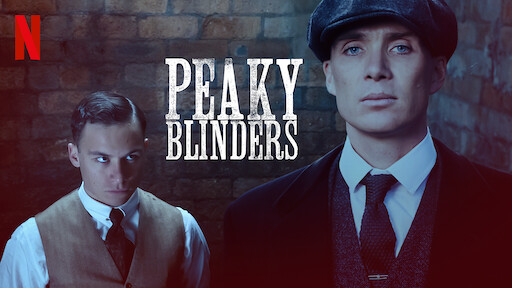

In [12]:
movie = get_recommendations('Peaky Blinders')

In [18]:
movie = movie.tolist()

In [19]:
movie[0]

'Project Gutenberg'

In [35]:
get_recommendations('Dark')

2968    42 Days of Darkness
2955       The Chestnut Man
2495         Altered Carbon
2901       Who Killed Sara?
137                Ad Astra
3164             Synchronic
2556                 Maniac
2585           The Stranger
2092            Lucid Dream
2870                   1899
Name: name, dtype: object